In [1]:
### The purpose of this notebook is to document the basic use of the libs.

import sys
import pandas as pd
import seaborn as sns

sys.path.append('..')
from lib.utils import load_existing_units_by_zip_code_and_reshape
from lib.utils import load_occupancy_by_zip_code_and_reshape
from lib.utils import load_occupancy_by_zip_code
from lib.utils import load_bos_acs_data_yearly

In [5]:
units = load_existing_units_by_zip_code_and_reshape()
bos_eunits = units.loc[(units.loc[:, 'Market Name'].str.upper().str.contains('BOSTON')).fillna(False)]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [11]:
bos_eunits

,Geography Name,Geography Type,Market Name,Unique ID,Metric Type,Metric Name,Category,Niche,time_period,e_units
4165,"Intown Boston (1), 02110",ZIP Code,"Boston-Cambridge-Newton, MA-NH",2110,Performance,Existing Units,Totals,Totals,Y2004Q2,365.0
4166,"Intown Boston (1), 02110",ZIP Code,"Boston-Cambridge-Newton, MA-NH",2110,Performance,Existing Units,Totals,Totals,Y2004Q3,365.0
4167,"Intown Boston (1), 02110",ZIP Code,"Boston-Cambridge-Newton, MA-NH",2110,Performance,Existing Units,Totals,Totals,Y2004Q4,365.0
4168,"Intown Boston (1), 02110",ZIP Code,"Boston-Cambridge-Newton, MA-NH",2110,Performance,Existing Units,Totals,Totals,Y2005Q1,365.0
4169,"Intown Boston (1), 02110",ZIP Code,"Boston-Cambridge-Newton, MA-NH",2110,Performance,Existing Units,Totals,Totals,Y2005Q2,365.0
...,...,...,...,...,...,...,...,...,...,...
418343,"Rockingham/Strafford Counties (15), 03878",ZIP Code,"Boston-Cambridge-Newton, MA-NH",3878,Performance,Existing Units,Totals,Totals,Y2021Q4,797.0
418344,"Rockingham/Strafford Counties (15), 03878",ZIP Code,"Boston-Cambridge-Newton, MA-NH",3878,Performance,Existing Units,Totals,Totals,Y2022Q1,797.0
418345,"Rockingham/Strafford Counties (15), 03878",ZIP Code,"Boston-Cambridge-Newton, MA-NH",3878,Performance,Existing Units,Totals,Totals,Y2022Q2,797.0
418346,"Rockingham/Strafford Counties (15), 03878",ZIP Code,"Boston-Cambridge-Newton, MA-NH",3878,Performance,Existing Units,Totals,Totals,Y2022Q3,797.0


In [14]:
bos_eunits
bos_eunits.groupby(['Unique ID','time_period']).agg({
    'e_units': 'sum'
}).reset_index()

,Unique ID,time_period,e_units
0,1460,Y2004Q1,173.0
1,1460,Y2004Q2,173.0
2,1460,Y2004Q3,173.0
3,1460,Y2004Q4,173.0
4,1460,Y2005Q1,173.0
...,...,...,...
10383,3878,Y2021Q4,797.0
10384,3878,Y2022Q1,797.0
10385,3878,Y2022Q2,797.0
10386,3878,Y2022Q3,797.0


In [7]:
bos_all = load_bos_acs_data_yearly()

In [10]:
bos_all[bos_all.zip==1460]


,zip,Total Population,Bachelor degree,Graduate or Professional Degree,Total Housing,Owner-occupied housing units,Renter-occupied housing units,Median Household Income (USD),Percentage of Rent,Year
66,1460,8810,3112,1471,3378,3198,180,103438,0.053286,2011
497,1460,8934,3428,1571,3476,3287,189,107518,0.054373,2012
928,1460,9038,3785,1686,3623,3416,207,105455,0.057135,2013
1358,1460,9157,3827,1703,3572,3346,226,111652,0.063270,2014
1787,1460,9359,3943,1697,3691,3446,245,111680,0.066378,2015
2214,1460,9538,3907,1702,3696,3554,142,108704,0.038420,2016
2640,1460,9754,3895,1765,3623,3440,183,119177,0.050511,2017
3069,1460,9935,3846,1825,3729,3559,170,120638,0.045589,2018
3497,1460,10071,3996,1936,3836,3657,179,123413,0.046663,2019


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


<Axes: ylabel='Unique ID'>

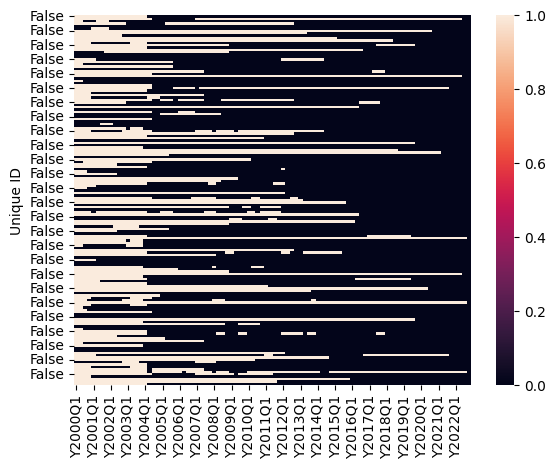

In [28]:
zips = load_bos_acs_data_yearly().loc[:, 'zip'].unique()

t = load_occupancy_by_zip_code()
bos_zips = t.loc[(t.loc[:, 'Market Name'].str.upper().str.contains('BOSTON')).fillna(False), 'Unique ID']


y_cols = ['Unique ID']
for col in t.columns:
    if col[0] == 'Y':
        y_cols.append(col)


sns.heatmap( (t.loc[(t.loc[:, 'Unique ID'].isin(bos_zips)),y_cols].isnull()).set_index('Unique ID') )


In [16]:
t=load_occupancy_by_zip_code() 
t.loc[(t.loc[:, 'Market Name'].str.upper().str.contains('BOSTON')).fillna(False)]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Geography Name,Geography Type,Market Name,Unique ID,Metric Type,Metric Name,Category,Niche,Y2000Q1,Y2000Q2,...,Y2020Q3,Y2020Q4,Y2021Q1,Y2021Q2,Y2021Q3,Y2021Q4,Y2022Q1,Y2022Q2,Y2022Q3,Y2022Q4
62,"Intown Boston (1), 02110",ZIP Code,"Boston-Cambridge-Newton, MA-NH",2110,Performance,Occupancy,Totals,Totals,NaN,NaN,...,0.9918,0.8770,0.9180,0.9590,0.9918,0.9918,0.9836,0.9836,0.9918,0.9836
63,"Fenway/Brookline/Brighton (2), 02445",ZIP Code,"Boston-Cambridge-Newton, MA-NH",2445,Performance,Occupancy,Totals,Totals,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9895,0.9634
64,"Chelsea/Revere/Charlestown (4), 02150",ZIP Code,"Boston-Cambridge-Newton, MA-NH",2150,Performance,Occupancy,Totals,Totals,NaN,NaN,...,0.9621,0.9391,0.9457,0.9630,0.9704,0.9593,0.9566,0.9689,0.9643,0.9425
65,"Southwest Boston (5), 02131",ZIP Code,"Boston-Cambridge-Newton, MA-NH",2131,Performance,Occupancy,Totals,Totals,NaN,NaN,...,0.9525,0.9586,0.9586,0.9562,0.9574,0.9793,0.9854,0.9683,0.9415,0.9537
66,"Quincy (6), 02188",ZIP Code,"Boston-Cambridge-Newton, MA-NH",2188,Performance,Occupancy,Totals,Totals,0.9343,0.9787,...,0.9589,0.9582,0.9545,0.9502,0.9602,0.9573,0.9616,0.9492,0.9522,0.9310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6496,"South Essex County (13), 01930",ZIP Code,"Boston-Cambridge-Newton, MA-NH",1930,Performance,Occupancy,Totals,Totals,NaN,NaN,...,0.9783,0.9674,0.9728,0.9674,0.9674,0.9728,0.9915,0.9915,0.9887,0.9802
6497,"North Essex County (14), 01843",ZIP Code,"Boston-Cambridge-Newton, MA-NH",1843,Performance,Occupancy,Totals,Totals,NaN,NaN,...,0.9338,0.9657,0.9620,0.9595,0.9547,0.9750,0.9721,0.9701,0.9557,0.9653
6498,"North Essex County (14), 01969",ZIP Code,"Boston-Cambridge-Newton, MA-NH",1969,Performance,Occupancy,Totals,Totals,NaN,NaN,...,0.9899,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6499,"Rockingham/Strafford Counties (15), 03053",ZIP Code,"Boston-Cambridge-Newton, MA-NH",3053,Performance,Occupancy,Totals,Totals,NaN,NaN,...,1.0000,0.9778,0.9778,0.9926,0.9630,0.9540,0.9540,0.9195,0.9655,0.9655


In [29]:
# pd.merge( pd.DataFrame(zips), sf_zips)
acs_zips = pd.DataFrame(zips).rename(columns={0: 'zip_code'}).astype(str)
bos_zips = bos_zips.reset_index(drop=True).to_frame().rename(columns={'Unique ID' : 'zip_code'})
bos_zips = bos_zips.astype(str)


### Number of zipcodes covered in the dataset for Boston MSA: 155

In [44]:
pd.merge(acs_zips,bos_zips)

,zip_code
0,1701
1,1721
2,1832
3,1845
4,1862
...,...
150,2184
151,2180
152,2359
153,2370


### Population & time

In [43]:
bos_all = load_bos_acs_data_yearly()
bos_all.groupby('Year').agg({
    'Total Population': 'sum',
    'Bachelor degree': 'sum',
    'Total Housing': 'sum',
    'Owner-occupied housing units': 'sum',
    'Renter-occupied housing units': 'sum',
    'Median Household Income (USD)': 'mean'
}).reset_index()

,Year,Total Population,Bachelor degree,Total Housing,Owner-occupied housing units,Renter-occupied housing units,Median Household Income (USD)
0,2011,6430455,1679493,2700442,2484562,215880,77697.454756
1,2012,6474189,1707694,2704670,2489434,215236,78564.779582
2,2013,6514797,1748147,2707957,2494020,213937,78912.688372
3,2014,6564875,1790993,2716055,2504057,211998,80276.278422
4,2015,6608448,1836572,2724688,2516599,208089,81388.176471
5,2016,6644818,1887458,2733110,2525240,207870,84085.960280
6,2017,6692721,1951366,2762608,2551172,211436,87494.177156
7,2018,6736281,2003399,2780297,2566024,214273,91380.752914
8,2019,6758715,2060323,2795269,2580626,214643,96115.915493


In [49]:
load_occupancy_by_zip_code_and_reshape().time_period

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


0         Y2000Q1
1         Y2000Q2
2         Y2000Q3
3         Y2000Q4
4         Y2001Q1
           ...   
461844    Y2021Q4
461845    Y2022Q1
461846    Y2022Q2
461847    Y2022Q3
461848    Y2022Q4
Name: time_period, Length: 461849, dtype: object